## Learning Objectives

Today we fit logistic regression into our ML framework and we show how we can use it to investigate the effect of a feature on the target.

## Linear Regression again 

Linear regression is often used as a small part of another algorithm because it is so fast and efficient, but it is actually used regularly for one more purpose, and that is to test for relation between features. The weights that it discovers as part of its model building can be interpreted as relations between the features and the outcome. And if we can be reasonably certain that these weights are not zero, then we can reasonable certain that there is a linear relationship (notice that I say linear here). 

Logistic regression can be used in nearly the same way which we will see below:

## Logistic Regression

Logistic regression is our first parametric classifier (I know! Then why is it call logistic regression?), and is a good deal more complex than linear regression. 

The reason why it is called logistic regression is because you can phrase the problem as regression on the log odds of something occuring. And then as a second step you transform the log odds into a probability and do your prediction with that. 

So we are back in a similar regime, if the weights that go into your log odds are not zero, then there is some relationship between your features and your outcome. The only difference is that your outcome is a qualitative feature or a class. Let's show how we could get a confidence interval for this weight:

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer_data = load_breast_cancer()

# we make our test set
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data['data'], breast_cancer_data['target'], test_size=0.2, random_state=1)

# and we make our validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [2]:
print X_train.shape, X_val.shape, X_test.shape

(364, 30) (91, 30) (114, 30)


However instead of building a model in this case let's test to see if the mean radius can be predictive in whether a cancer will spread or not:

In [4]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

def get_log_reg_coef(data):
    return LogisticRegression().fit(data[:, 0][:, None], data[:, 1]).coef_[0]


coefs = sns.algorithms.bootstrap(zip(X_train[:, 0], y_train), func=get_log_reg_coef)

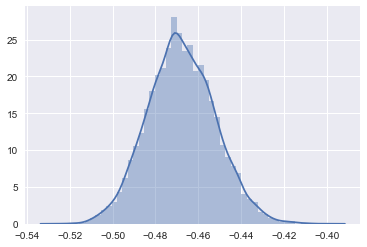

In [5]:
%matplotlib inline

sns.distplot(coefs)

And now we are able to see that there is a small but measured effect. But what does this translate into?

Well to understand the effect of one feature on the target in logistic regression we again view the coefs. But the coefs are not in a strictly linear relationship. 

But it's called logistic regression right? Well the idea is that we regress onto the log odds, so ultimately the parameters that we are left with are saying: for every 1 increase in size of the tumor there is a decrease of .48 in the log odds of it spreading. 

This translates to the odds of the thing happening decreasing by a factor of exp(-.48) or around .61

Now to the details:

In [ ]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

c0 = 'Unknown target function, f(X) = y + noise'
c1 = 'Inputs, (x_1, y_1), ..., (x_n, y_n)'
c2 = 'Learning Algorithm'
c3 = 'Hypothesis set, H'
c4 = 'Final Hypothesis, g(X) = y'
c5 = 'IID samples from a r.v. X'
c6 = 'Train set'
c7 = 'Test set'
c8 = 'Reported Hypothesis Performance'
c9 = 'Error Measure'

nodes = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]

G = nx.DiGraph()

for n in nodes:
    G.add_node(n)

G.add_edge(c0, c1)
G.add_edge(c3, c2)
G.add_edge(c2, c4)
G.add_edge(c5, c1)
G.add_edge(c1, c6)
G.add_edge(c1, c7)
G.add_edge(c6, c2)
G.add_edge(c7, c8)
G.add_edge(c4, c8)
G.add_edge(c9, c8)
G.add_edge(c9, c2)

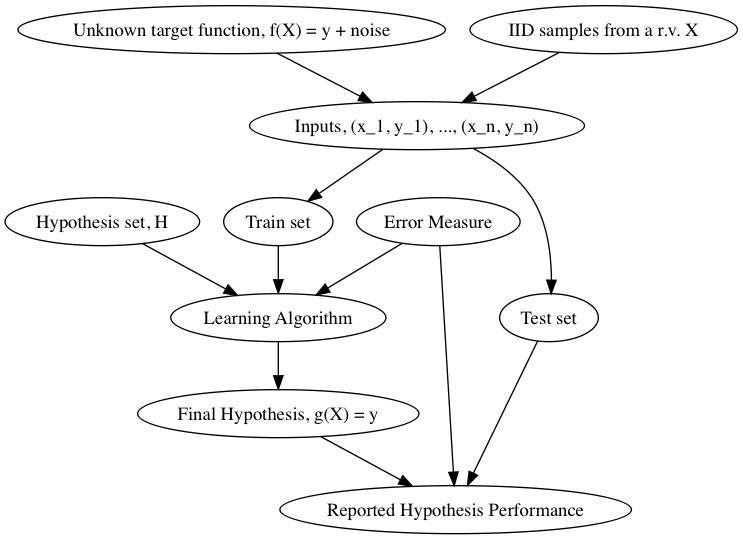

In [43]:
draw(G)

To do that we can refer back to our assumptions. So the machine learning algorithm is composed of five parts of the above diagram:

0. Inputs
1. Hypothesis Set
2. Learning Algorithm
3. Error Measure
3. Final Hypothesis

#### Inputs and Outputs

Logistic regression (dispite its name) is a classifier and therefore is used for predicting classes or qualitative features. One important thing to note is that naively logistic regression can only binary values: a yes or a no. To predict more than one class you will need to use a multiclass extension (one vs all or one vs rest are common approaches).

In summary logsitic regression is a binary classification model.

#### Hypothesis Set

The hypothesis set is pretty similar to linear regression. We consider all w's such that:

$$ L = w_0 + w_1 * x_1 + ... + w_n * x_n$$

Where L is the log odds and each $x_i$ is a particular feature. Again the hypothesis set is infinite in the same way as before.

#### Learning Algorithm

The learning algorithm is significantly different from linear regression. It is still memory efficient, but it is no where near as fast. Now it is somewhat fast compared to other algorithms, but linear regression is blazing fast.


#### Error Measure

Technically the error that logistic regression minimizes is something called the cross entropy, but that term in itself is not very interpretable. So instead it is better to keep track of the accuracy or the percision and recall.


#### Final hypothesis

The final hypothesis is simply the set of weights associated with the formula above. So it is easy to store and quick to evaluate.

## Learning Objectives

Today we fit logistic regression into our ML framework and we show how we can use it to investigate the effect of a feature on the target.

## Comprehension Questions

1.	Why do we call logistic regression a regression?
2.	What does logistic regression output?
3.	If there was no relation between the features and the targets, what would the confidence intervals of the parameters of a logistic regression between them look like?
4.	What is an interpretable error measure for logistic regression?
5.	How would you code the learning algorithm for logistic regression without sklearn?
